In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
# Load dataset
dataset = pd.read_csv('./Concrete_DataNew.csv')
dataset.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Blast               1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CA                  1030 non-null float64
FA                  1030 non-null float64
Age                 1030 non-null int64
CMS                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
Concrete_DataNew = pp.ProfileReport(dataset)
Concrete_DataNew.to_file('Concrete_DataNew_assign2.html')
display(IFrame('Concrete_DataNew_assign2.html', width=900, height=350))

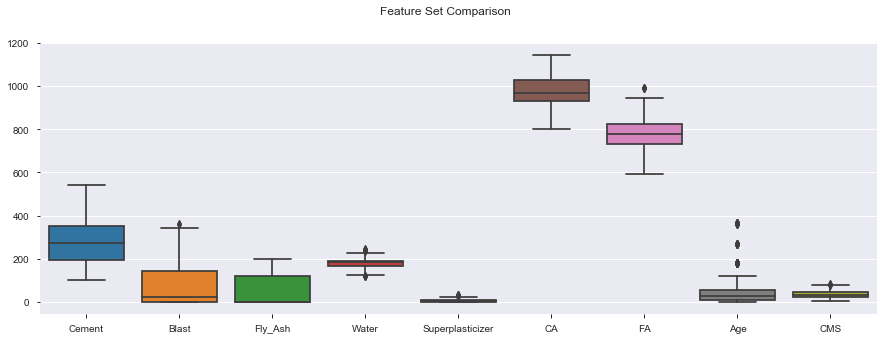

In [5]:
# BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

In [6]:
# Review Correlation between Variables
dataset.corr()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


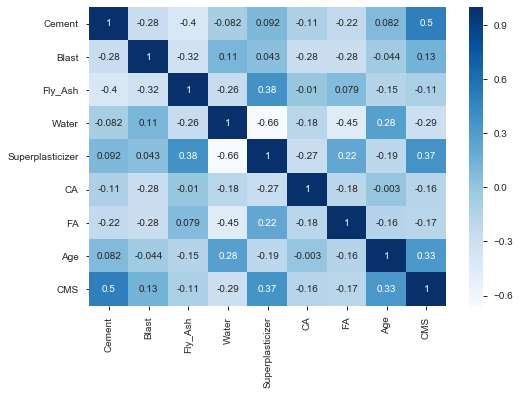

In [7]:
# Visualiztion of Correlations
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [8]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


In [9]:
# Prepare for Models for Comparison

#Create x and y variables
x = dataset.drop('CMS', axis=1).values
Y = dataset['CMS'].values

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

#Import Models
from sklearn.neighbors import KNeighborsRegressor

In [10]:
#Create Optimal KNN model
classifier = KNeighborsRegressor()

#Fit KNN Model
classifier.fit(x_train2, y_train)

#Prediction
y_pred = classifier.predict(x_test2)

#Evaluate the Algorithm
#R2,MAE,MSE and RMSE
print('Original Model')
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,y_pred)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 

Original Model

R2: 0.79
Mean Absolute Error: 6.21
Mean Squared Error: 63.79
Root Mean Squared Error: 7.99


In [11]:
print(x_train2.shape)
print(y_train.shape)

(824, 8)
(824,)


In [12]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsRegressor(n_jobs=-1))])

In [13]:
# Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,15])
    plt.show()


 k-NN Learning Curve


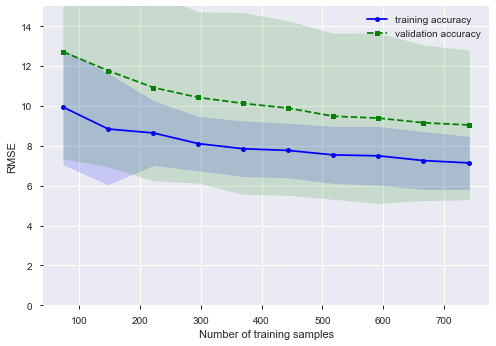

In [14]:
# Plot Learning Curve
print('\n k-NN Learning Curve')
plot_learning_curves(pipe_knn)

In [15]:
# Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

#k-NN Regression Model
knnreg2 = KNeighborsRegressor()
k_range = range(1, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         n_jobs=-1,scoring='neg_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Models') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(y_test, y_pred3)))
     print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_pred3)))  
     print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, y_pred3)))  
     print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))  

Optimized Models

Estimator: k-NN Regression Model

Best params: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

R2: 0.81
Mean Absolute Error: 5.51
Mean Squared Error: 57.15
Root Mean Squared Error: 7.56


NameError: name 'train_mean' is not defined